In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


## Carga de datos

In [16]:
df_insqui = pd.read_csv("../../data/raw/nasa/coord_index.csv")
df_insqui

,row_id,tipo_actividad,latitud,longitud,lat_r,lon_r,coord_hash
0,0,Administrativa,3.41,-76.53,3.41,-76.53,75246e90e485
1,1,Administrativa,4.62,-74.11,4.62,-74.11,a71c8bc52a66
2,2,Administrativa,4.71,-74.23,4.71,-74.23,be6b4f99fea5
3,3,Administrativa,4.81,-74.10,4.81,-74.10,ac2a0153bf6b
4,4,Administrativa,4.81,-75.72,4.81,-75.72,6a956df3c5d9
...,...,...,...,...,...,...,...
385,385,Producción,10.90,-74.88,10.90,-74.88,c35a5af557e6
386,386,Producción,10.91,-74.79,10.91,-74.79,f482b38c33e4
387,387,Producción,10.98,-74.82,10.98,-74.82,a0137c350549
388,388,Producción,11.23,-74.19,11.23,-74.19,8521e6fdb4ca


In [17]:
df_seismic = pd.read_csv("../../data/transformed/usgs/usgs_seismic_clean.csv")
df_seismic

,row_id,n_sismos_M4,n_sismos_M5,mag_max,mag_mean,depth_mean,pct_superficiales,years_since_last_M5
0,0,24,24,5.6,4.629167,103.410167,0.125000,0.164384
1,1,26,26,6.1,4.503846,54.055038,0.576923,0.479452
2,2,25,25,6.1,4.492000,61.754040,0.480000,0.479452
3,3,29,29,6.1,4.489655,58.503138,0.517241,0.479452
4,4,46,46,6.1,4.543478,98.812261,0.130435,0.391781
...,...,...,...,...,...,...,...,...
385,385,4,4,4.5,4.225000,38.115500,0.250000,3.019178
386,386,4,4,4.5,4.225000,38.115500,0.250000,3.019178
387,387,4,4,4.5,4.225000,38.115500,0.250000,3.019178
388,388,10,10,4.9,4.440000,21.246200,0.700000,1.002740


# Model PCA

In [24]:
vars_sismo = [
    "n_sismos_M4",
    "n_sismos_M5",
    "mag_max",
    "mag_mean",
    "depth_mean",
    "pct_superficiales",
    "years_since_last_M5"
]


In [ ]:
# Standardizar las variables sismo
X = df_seismic[vars_sismo].copy()

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


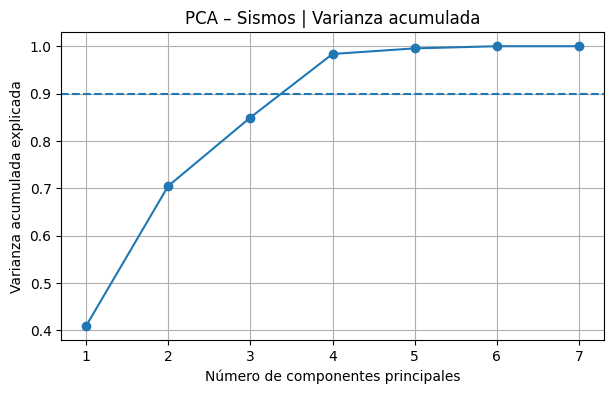

In [ ]:
# Varianza explicada
explained_var = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained_var)

# Gráfico de varianza acumulada
plt.figure(figsize=(7, 4))
plt.plot(
    range(1, len(cum_explained) + 1),
    cum_explained,
    marker="o"
)
plt.axhline(0.9, linestyle="--")
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza acumulada explicada")
plt.title("PCA – Sismos | Varianza acumulada")
plt.grid(True)
plt.show()


In [ ]:
# Cargar los loadings
loadings_3 = loadings[["PC1", "PC2", "PC3"]]
loadings_3


,PC1,PC2,PC3
n_sismos_M4,0.499860,-0.218358,-0.205627
n_sismos_M5,0.499860,-0.218358,-0.205627
mag_max,0.326797,0.569025,0.029874
mag_mean,0.261875,0.582837,0.250840
depth_mean,0.506279,-0.047885,0.313640
pct_superficiales,-0.186591,0.487974,-0.526135
years_since_last_M5,-0.183766,0.027180,0.690242


**PC1:** nivel general de actividad sísmica

**PC2:** potencial de daño

**PC3:** dinámica temporal del riesgo

In [ ]:
# Guardar los scores de las primeras 3 componentes principales
df_pc_sismo = pd.DataFrame(
    X_pca[:, :3],
    columns=["PC1_sismo", "PC2_sismo", "PC3_sismo"],
    index=df_seismic.index
)
df_pc_sismo

,PC1_sismo,PC2_sismo,PC3_sismo
0,0.874367,-0.198804,0.702304
1,-0.229647,1.090314,-0.716757
2,-0.039214,0.850133,-0.397304
3,-0.074214,0.918289,-0.543496
4,1.145969,-0.098763,0.684101
...,...,...,...
385,-1.510670,-0.469621,1.781892
386,-1.510670,-0.469621,1.781892
387,-1.510670,-0.469621,1.781892
388,-1.523966,0.870470,-0.932699


In [ ]:
# Combinar los scores con el dataframe original
df_seismic_pc = pd.concat(
    [df_seismic, df_pc_sismo],
    axis=1
)

df_seismic_pc.to_csv("../../data/processed/usgs/usgs_seismic_with_pca.csv", index=False)